#**For City T**

In [ ]:
!pip install gdown
import gdown
url = "https://drive.google.com/drive/folders/18Ch6KvqJ64DYEBs-_TnwwVI0Z5Lqidqk?usp=sharing"
gdown.download_folder(url, quiet=True, use_cookies=False)

['/content/Multi-step forecasting in multivariate time series data/B_test.csv',
 '/content/Multi-step forecasting in multivariate time series data/B_train.csv',
 '/content/Multi-step forecasting in multivariate time series data/G_test.csv',
 '/content/Multi-step forecasting in multivariate time series data/G_train.csv',
 '/content/Multi-step forecasting in multivariate time series data/Readme.pdf',
 '/content/Multi-step forecasting in multivariate time series data/S_test.csv',
 '/content/Multi-step forecasting in multivariate time series data/S_train.csv',
 '/content/Multi-step forecasting in multivariate time series data/T_test.csv',
 '/content/Multi-step forecasting in multivariate time series data/T_train.csv']

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install tensorflow
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout ,GRU

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Multi-step forecasting in multivariate time series data/T_train.csv')
df

,Unnamed: 0,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
0,2014-05-01 00:00:00,0.0,0.568627,0.475410,0.56,0.133333,23.0,0.164141,0.123932,0.088222,0.277929,0.114228,81.0
1,2014-05-01 01:00:00,0.0,0.549020,0.475410,0.59,0.116667,23.0,0.194444,0.136752,0.116895,0.245232,0.114228,88.0
2,2014-05-01 02:00:00,0.0,0.549020,0.475410,0.61,0.200000,3.0,0.190657,0.183761,0.149978,0.231608,0.148297,98.0
3,2014-05-01 03:00:00,0.0,0.509804,0.459016,0.66,0.058333,23.0,0.190657,0.162393,0.107442,0.258856,0.156313,117.0
4,2014-05-01 04:00:00,0.0,0.529412,0.459016,0.63,0.083333,23.0,0.175505,0.200855,0.112988,0.217984,0.198397,109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,2015-02-16 18:00:00,0.0,0.372549,0.606557,0.27,0.196759,14.0,0.200758,0.072650,0.071145,0.062670,0.074148,43.0
7003,2015-02-16 19:00:00,0.0,0.372549,0.639344,0.28,0.133333,14.0,0.171717,0.085470,0.074611,0.046322,0.060120,35.0
7004,2015-02-16 20:00:00,0.0,0.372549,0.639344,0.28,0.133333,14.0,0.126263,0.115385,0.090995,0.038147,0.094188,39.0
7005,2015-02-16 21:00:00,0.0,0.352941,0.639344,0.26,0.091667,14.0,0.084596,0.141026,0.080030,0.029973,0.106212,36.0


In [ ]:
df.describe()

,weather,temperature,pressure,humidity,wind_speed,wind_direction,PM10_Concentration,NO2_Concentration,CO_Concentration,O3_Concentration,SO2_Concentration,PM25_Concentration
count,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000,7007.000000
mean,2.064364,0.509888,0.588999,0.568858,0.173264,15.168260,0.173658,0.184302,0.114327,0.156903,0.064573,91.248323
std,3.590754,0.226706,0.170793,0.253219,0.110123,8.096942,0.123176,0.121809,0.081558,0.157714,0.067672,77.447274
min,0.000000,0.039216,0.213115,0.000000,0.000000,0.000000,0.001263,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.294118,0.426230,0.360000,0.100000,13.000000,0.083333,0.094017,0.061661,0.029973,0.022044,35.000000
50%,1.000000,0.568627,0.573770,0.570000,0.150000,14.000000,0.145202,0.153846,0.096603,0.108992,0.044088,71.000000
75%,2.000000,0.686275,0.737705,0.780000,0.225000,23.000000,0.227273,0.252137,0.144307,0.234332,0.082164,124.000000
max,16.000000,1.000000,1.000000,0.990000,1.000000,24.000000,1.000000,0.931624,1.000000,0.882834,1.000000,609.000000


In [ ]:
df.isnull().sum()

Unnamed: 0            0
weather               0
temperature           0
pressure              0
humidity              0
wind_speed            0
wind_direction        0
PM10_Concentration    0
NO2_Concentration     0
CO_Concentration      0
O3_Concentration      0
SO2_Concentration     0
PM25_Concentration    0
dtype: int64

In [ ]:
# Assuming your DataFrame is named df
# Replace 'PM25_Concentration' with the column name you want to predict
target_column = 'PM25_Concentration'

# Extract features and target variable
features = df.drop(columns=['Unnamed: 0'], axis=1).values
target = df[target_column]

# Normalize the data
# scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = features

In [ ]:
test_df = pd.read_csv('/content/Multi-step forecasting in multivariate time series data/T_test.csv')

# Extract features and target variable
test_features = test_df.drop(columns=['Unnamed: 0'], axis=1).values
test_target = test_df[target_column]

# Normalize the data
# test_scaler = MinMaxScaler(feature_range=(0, 1))
test_features_scaled = test_features
y_actual_test = [i for i in test_target]

In [ ]:
features

array([[0.00000000e+00, 5.68627451e-01, 4.75409836e-01, ...,
        2.77929155e-01, 1.14228457e-01, 8.10000000e+01],
       [0.00000000e+00, 5.49019608e-01, 4.75409836e-01, ...,
        2.45231608e-01, 1.14228457e-01, 8.80000000e+01],
       [0.00000000e+00, 5.49019608e-01, 4.75409836e-01, ...,
        2.31607629e-01, 1.48296593e-01, 9.80000000e+01],
       ...,
       [0.00000000e+00, 3.72549020e-01, 6.39344262e-01, ...,
        3.81471390e-02, 9.41883768e-02, 3.90000000e+01],
       [0.00000000e+00, 3.52941176e-01, 6.39344262e-01, ...,
        2.99727520e-02, 1.06212425e-01, 3.60000000e+01],
       [0.00000000e+00, 3.52941176e-01, 6.39344262e-01, ...,
        3.26975477e-02, 8.21643287e-02, 2.80000000e+01]])

In [ ]:
import math

def seq_len(x):
  result = x + int((math.log(2 * x))**2) + 4
  return result

In [ ]:
def model_v(X_train,predict_steps):
  model = Sequential()
  model.add(GRU(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.2))
  model.add(Dense(units=predict_steps))
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

In [ ]:

def whole_working(predict_steps):

  sequence_length = seq_len(predict_steps)

  X, y = [], []

  for i in range(len(features_scaled) - sequence_length - predict_steps + 1):
      X.append(features_scaled[i:(i + sequence_length), :])
      y.append(target.values[i + sequence_length:i + sequence_length + predict_steps])

  X, y = np.array(X), np.array(y)

  # Split the data into training and testing sets
  X_train = X
  y_train = y

  X_test, y_test = [], []

  for i in range(len(test_features_scaled) - sequence_length - predict_steps):
      X_test.append(test_features_scaled[i:(i + sequence_length), :])
      y_test.append(test_target.values[i + sequence_length:i + sequence_length + predict_steps])

  X_test, y_test = np.array(X_test), np.array(y_test)


  # Finding minimum and maximum values for y_train
  min_v = np.min(y_train)
  max_v = np.max(y_train)
  scale_down = (y_train - min_v) / (max_v - min_v)
  scale_down = np.array(scale_down)
  # scale_down

  # Display the model summary
  # model.summary()

  model = model_v(X_train,predict_steps)

  # Train the model and store the history
  history = model.fit(X_train, y_train, epochs=50, batch_size=80, verbose=2)

  name = 'T_City_'+str(predict_steps)+'.h5'

  model.save_weights(name)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  min_v_pred = np.min(y_pred)
  max_v_pred = np.max(y_pred)

  # Finding minimum and maximum values for y_test
  min_v_test = np.min(y_test)
  max_v_test = np.max(y_test)

  print(min_v_test, max_v_test)

  y_pred_scaledup = [min_v+i*(max_v-min_v) for i in y_pred]
  y_pred_scaleD = [(i-min_v_pred)/(max_v_pred-min_v_pred) for i in y_pred]
  y_test_scaleD=[(i-min_v_test)/(max_v_test-min_v_test) for i in y_test]

  mse = np.mean(np.square(y_pred - y_test))
  mae = np.mean(abs(y_pred - y_test))
  print(f'Sequence Length {sequence_length}\nMean Squared Error on Test Set :{mse}\nMean Absolurte Error on Test Set : {mae}')

  y_pred_scaleD=np.array(y_pred_scaleD)
  y_test_scaleD=np.array(y_test_scaleD)

  mse = np.mean(np.square(y_pred_scaleD - y_test_scaleD))
  mae = np.mean(abs(y_pred_scaleD - y_test_scaleD))
  print(f'Sequence Length {sequence_length}\nMean Squared Error on Test Set: {mse}\nMean Absolurte Error on Test Set: {mae}')

  y_test_val=[i[0] for i in y_test]
  y_pred_val=[i[0] for i in y_pred]

  import matplotlib.pyplot as plt

  plt.figure(figsize=(20, 5))
  plt.plot(y_test_val, label='Real PM25')
  plt.plot(y_pred_val, label='Predicted PM25', c='g')
  plt.xlabel('Timestamp')
  plt.ylabel('PM25 Concentration')
  plt.title('Real and Predicted PM25 -> Station T (SCALED)')
  plt.legend()
  plt.show()

  print('\n\n')

  index = int((len(y_pred)-1)/2)
  past_ins = [y_actual_test[i] for i in range(index+1,sequence_length+index+1)]
  past_ins.append(y_pred[index][0])
  x_values = [str(i) for i in range(index-sequence_length,index+1)]
  x_values_future=[str(int(x_values[len(x_values)-1])+i) for i in range(predict_steps)]

  plt.figure(figsize=(20, 5))
  plt.plot(x_values,past_ins,label = 'Past Instances taken ',c='blue',marker='o')
  plt.plot(x_values_future,y_pred[index], label='Future values predicted ', c='g',marker='o')
  plt.xlabel('Timestamp')
  plt.ylabel('PM25 Concentration')
  plt.title('Prediction after last Test Instance -> Station T')
  plt.legend()
  plt.show()

Model Running and predicting for step-size : 1
Epoch 1/50
88/88 - 3s - loss: 6093.9590 - mae: 50.7614 - 3s/epoch - 30ms/step
Epoch 2/50
88/88 - 0s - loss: 882.6081 - mae: 18.9167 - 441ms/epoch - 5ms/step
Epoch 3/50
88/88 - 0s - loss: 770.9934 - mae: 17.7338 - 438ms/epoch - 5ms/step
Epoch 4/50
88/88 - 0s - loss: 737.7585 - mae: 17.3352 - 449ms/epoch - 5ms/step
Epoch 5/50
88/88 - 0s - loss: 769.9628 - mae: 17.4010 - 455ms/epoch - 5ms/step
Epoch 6/50
88/88 - 0s - loss: 698.3710 - mae: 16.9607 - 446ms/epoch - 5ms/step
Epoch 7/50
88/88 - 0s - loss: 754.1688 - mae: 17.2857 - 434ms/epoch - 5ms/step
Epoch 8/50
88/88 - 0s - loss: 745.0057 - mae: 17.1329 - 444ms/epoch - 5ms/step
Epoch 9/50
88/88 - 0s - loss: 764.5798 - mae: 17.3545 - 436ms/epoch - 5ms/step
Epoch 10/50
88/88 - 0s - loss: 749.0037 - mae: 17.2386 - 420ms/epoch - 5ms/step
Epoch 11/50
88/88 - 1s - loss: 681.2729 - mae: 16.6236 - 613ms/epoch - 7ms/step
Epoch 12/50
88/88 - 1s - loss: 722.7280 - mae: 16.9145 - 894ms/epoch - 10ms/step
Ep

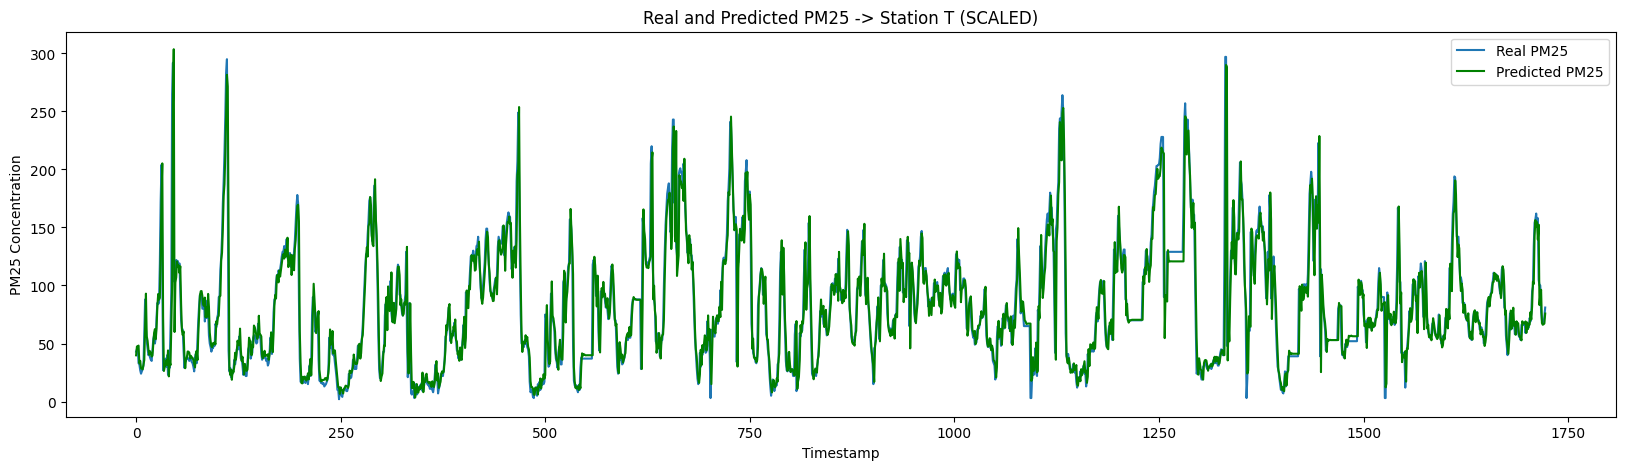

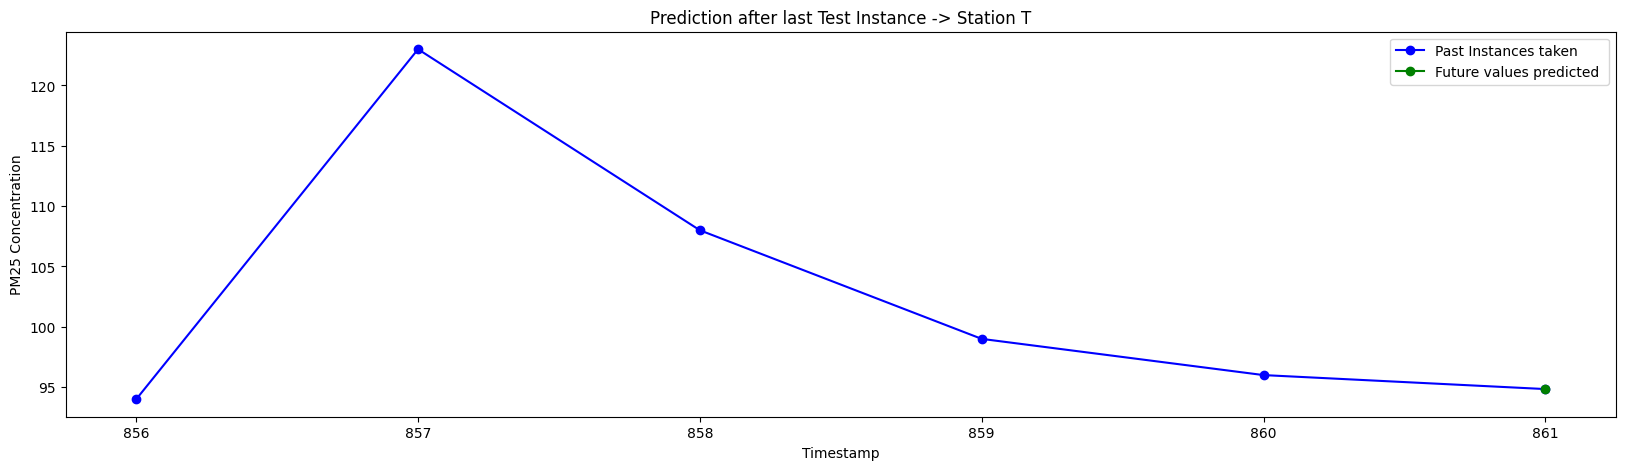

Model Running and predicting for step-size : 7
Epoch 1/50
88/88 - 3s - loss: 9575.4902 - mae: 68.8319 - 3s/epoch - 36ms/step
Epoch 2/50
88/88 - 2s - loss: 3031.2300 - mae: 37.4527 - 2s/epoch - 18ms/step
Epoch 3/50
88/88 - 1s - loss: 2840.8098 - mae: 36.1665 - 959ms/epoch - 11ms/step
Epoch 4/50
88/88 - 2s - loss: 2668.9563 - mae: 35.0520 - 2s/epoch - 19ms/step
Epoch 5/50
88/88 - 2s - loss: 2565.5012 - mae: 34.1281 - 2s/epoch - 24ms/step
Epoch 6/50
88/88 - 2s - loss: 2494.6807 - mae: 33.6970 - 2s/epoch - 20ms/step
Epoch 7/50
88/88 - 1s - loss: 2473.1743 - mae: 33.2725 - 1s/epoch - 14ms/step
Epoch 8/50
88/88 - 1s - loss: 2391.1965 - mae: 32.6480 - 949ms/epoch - 11ms/step
Epoch 9/50
88/88 - 1s - loss: 2388.0066 - mae: 32.3283 - 1s/epoch - 16ms/step
Epoch 10/50
88/88 - 1s - loss: 2320.2324 - mae: 32.0602 - 1s/epoch - 16ms/step
Epoch 11/50
88/88 - 1s - loss: 2311.4937 - mae: 31.8325 - 938ms/epoch - 11ms/step
Epoch 12/50
88/88 - 1s - loss: 2283.8811 - mae: 31.5999 - 938ms/epoch - 11ms/step
Ep

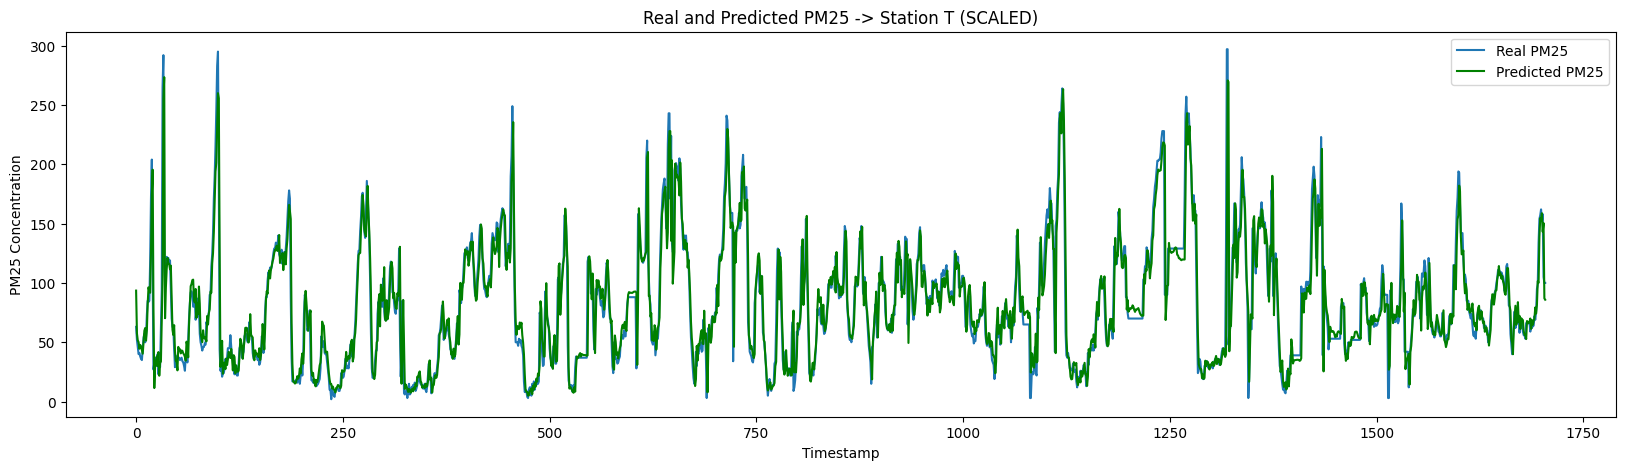

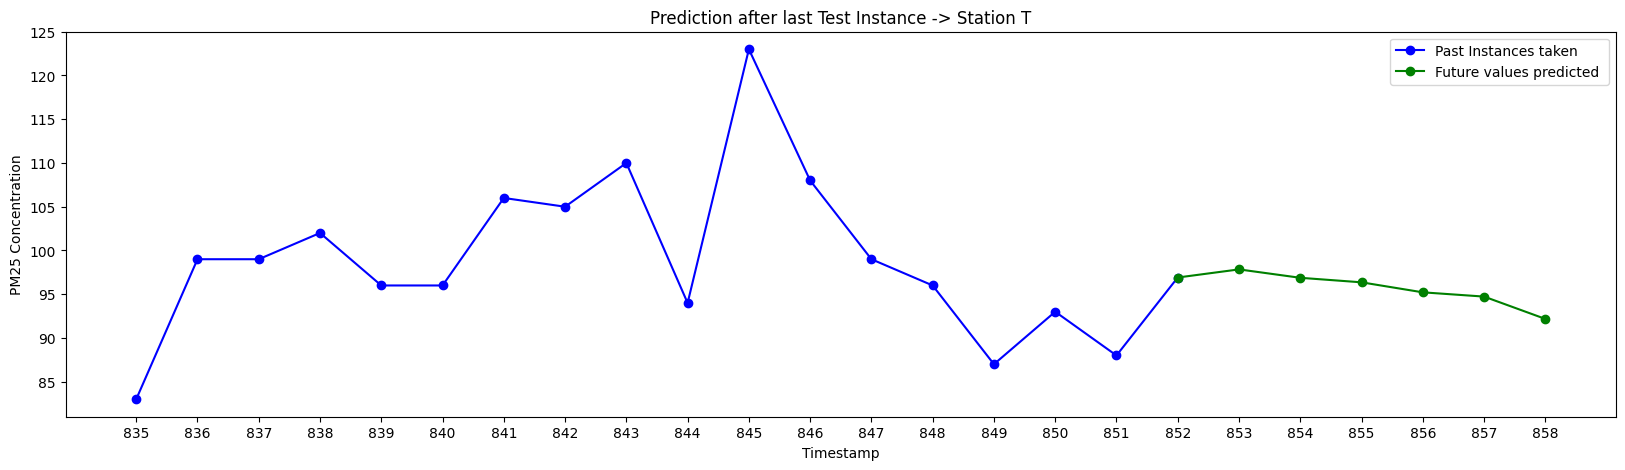

Model Running and predicting for step-size : 14
Epoch 1/50
88/88 - 3s - loss: 9236.2959 - mae: 68.7816 - 3s/epoch - 35ms/step
Epoch 2/50
88/88 - 2s - loss: 4262.6753 - mae: 46.1712 - 2s/epoch - 28ms/step
Epoch 3/50
88/88 - 2s - loss: 3943.1702 - mae: 44.1914 - 2s/epoch - 26ms/step
Epoch 4/50
88/88 - 2s - loss: 3762.1362 - mae: 43.2240 - 2s/epoch - 17ms/step
Epoch 5/50
88/88 - 1s - loss: 3823.8425 - mae: 43.6240 - 1s/epoch - 17ms/step
Epoch 6/50
88/88 - 1s - loss: 3678.4585 - mae: 42.6497 - 1s/epoch - 17ms/step
Epoch 7/50
88/88 - 1s - loss: 3614.6606 - mae: 42.1807 - 1s/epoch - 17ms/step
Epoch 8/50
88/88 - 1s - loss: 3505.8027 - mae: 41.5720 - 1s/epoch - 17ms/step
Epoch 9/50
88/88 - 1s - loss: 3451.5571 - mae: 41.1229 - 1s/epoch - 17ms/step
Epoch 10/50
88/88 - 2s - loss: 3392.5830 - mae: 40.6712 - 2s/epoch - 22ms/step
Epoch 11/50
88/88 - 2s - loss: 3391.1877 - mae: 40.3585 - 2s/epoch - 27ms/step
Epoch 12/50
88/88 - 2s - loss: 3362.6440 - mae: 40.3850 - 2s/epoch - 22ms/step
Epoch 13/50
8

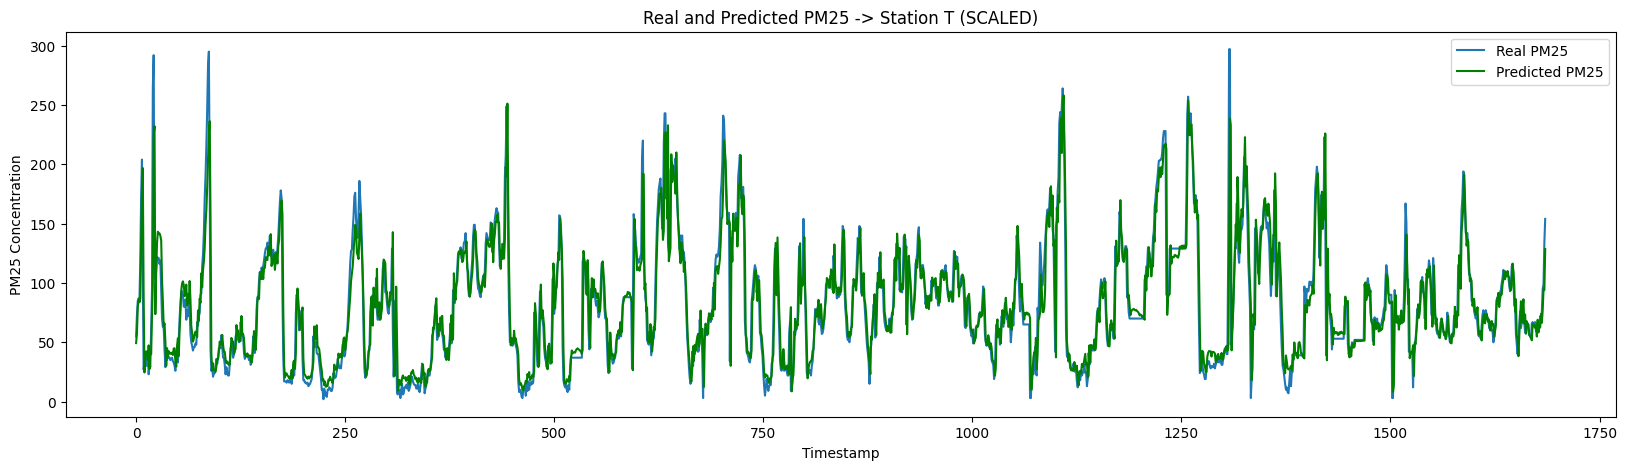

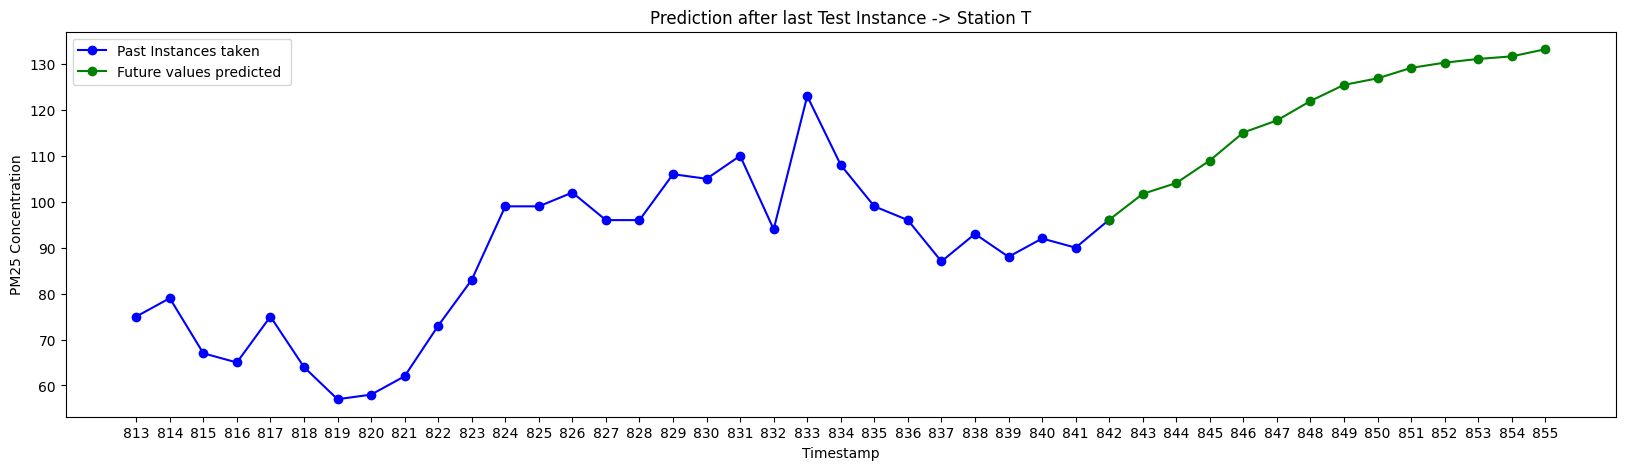

Model Running and predicting for step-size : 30
Epoch 1/50
87/87 - 4s - loss: 8445.1006 - mae: 65.3475 - 4s/epoch - 44ms/step
Epoch 2/50
87/87 - 2s - loss: 5283.6973 - mae: 52.3878 - 2s/epoch - 26ms/step
Epoch 3/50
87/87 - 2s - loss: 4974.9165 - mae: 50.8483 - 2s/epoch - 26ms/step
Epoch 4/50
87/87 - 4s - loss: 4837.7021 - mae: 50.0618 - 4s/epoch - 44ms/step
Epoch 5/50
87/87 - 3s - loss: 4658.3984 - mae: 49.1200 - 3s/epoch - 30ms/step
Epoch 6/50
87/87 - 2s - loss: 4569.6562 - mae: 48.5139 - 2s/epoch - 26ms/step
Epoch 7/50
87/87 - 2s - loss: 4470.1343 - mae: 47.9538 - 2s/epoch - 26ms/step
Epoch 8/50
87/87 - 2s - loss: 4447.6978 - mae: 47.5242 - 2s/epoch - 26ms/step
Epoch 9/50
87/87 - 3s - loss: 4379.8857 - mae: 47.2491 - 3s/epoch - 31ms/step
Epoch 10/50
87/87 - 4s - loss: 4204.7124 - mae: 46.3695 - 4s/epoch - 43ms/step
Epoch 11/50
87/87 - 2s - loss: 4246.2173 - mae: 46.3854 - 2s/epoch - 26ms/step
Epoch 12/50
87/87 - 2s - loss: 4253.6655 - mae: 46.5750 - 2s/epoch - 26ms/step
Epoch 13/50
8

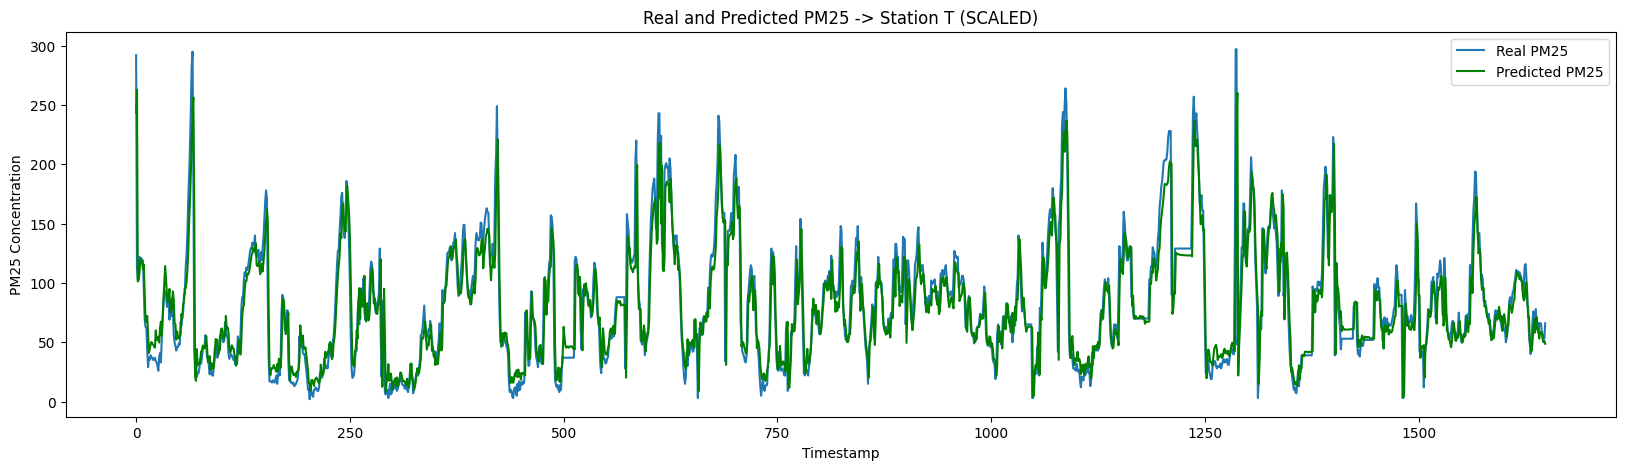

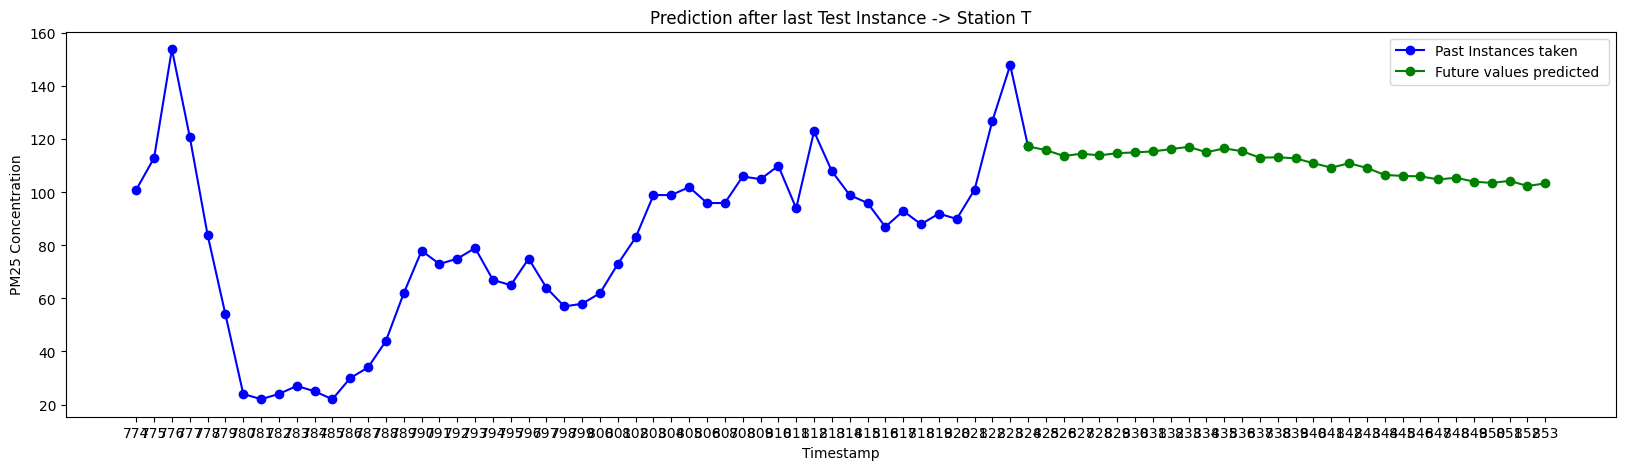

Model Running and predicting for step-size : 60
Epoch 1/50
86/86 - 5s - loss: 9584.8301 - mae: 70.4864 - 5s/epoch - 60ms/step
Epoch 2/50
86/86 - 5s - loss: 5737.4214 - mae: 54.9957 - 5s/epoch - 55ms/step
Epoch 3/50
86/86 - 5s - loss: 5340.1895 - mae: 53.4769 - 5s/epoch - 53ms/step
Epoch 4/50
86/86 - 4s - loss: 5087.2554 - mae: 52.4064 - 4s/epoch - 42ms/step
Epoch 5/50
86/86 - 4s - loss: 4844.1748 - mae: 51.0903 - 4s/epoch - 42ms/step
Epoch 6/50
86/86 - 6s - loss: 4690.7783 - mae: 50.3579 - 6s/epoch - 66ms/step
Epoch 7/50
86/86 - 4s - loss: 4682.6714 - mae: 50.0787 - 4s/epoch - 42ms/step
Epoch 8/50
86/86 - 4s - loss: 4670.1196 - mae: 50.1453 - 4s/epoch - 42ms/step
Epoch 9/50
86/86 - 5s - loss: 4628.0186 - mae: 49.5275 - 5s/epoch - 54ms/step
Epoch 10/50
86/86 - 5s - loss: 4484.5918 - mae: 48.8836 - 5s/epoch - 54ms/step
Epoch 11/50
86/86 - 4s - loss: 4281.1982 - mae: 48.1310 - 4s/epoch - 42ms/step
Epoch 12/50
86/86 - 4s - loss: 4474.6699 - mae: 48.9879 - 4s/epoch - 42ms/step
Epoch 13/50
8

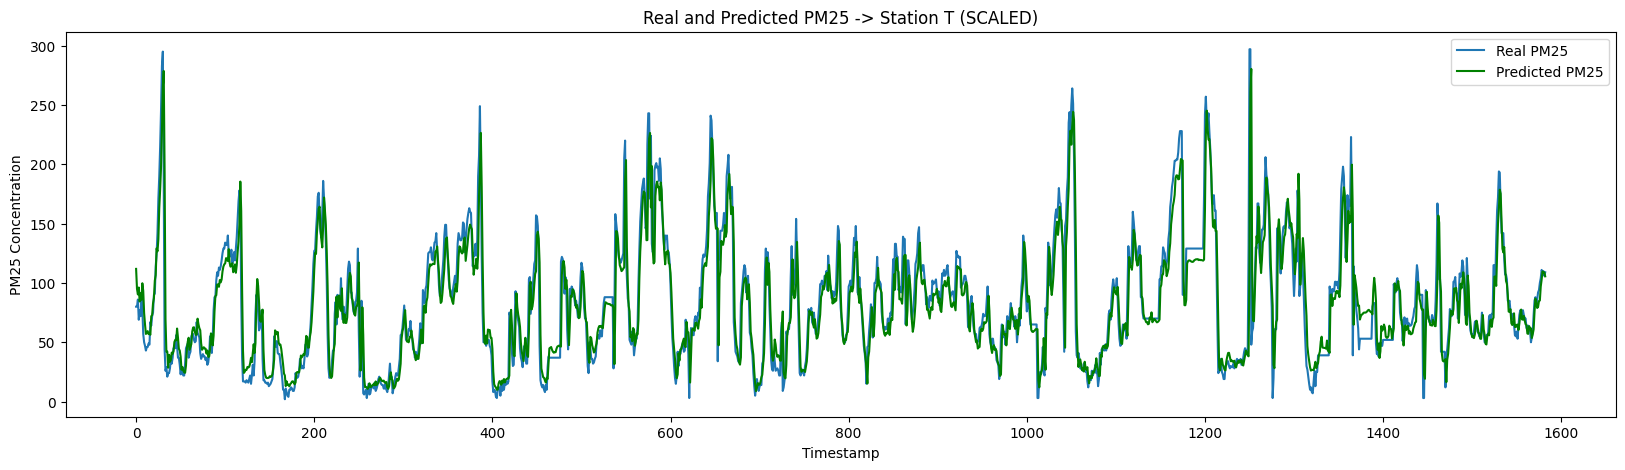

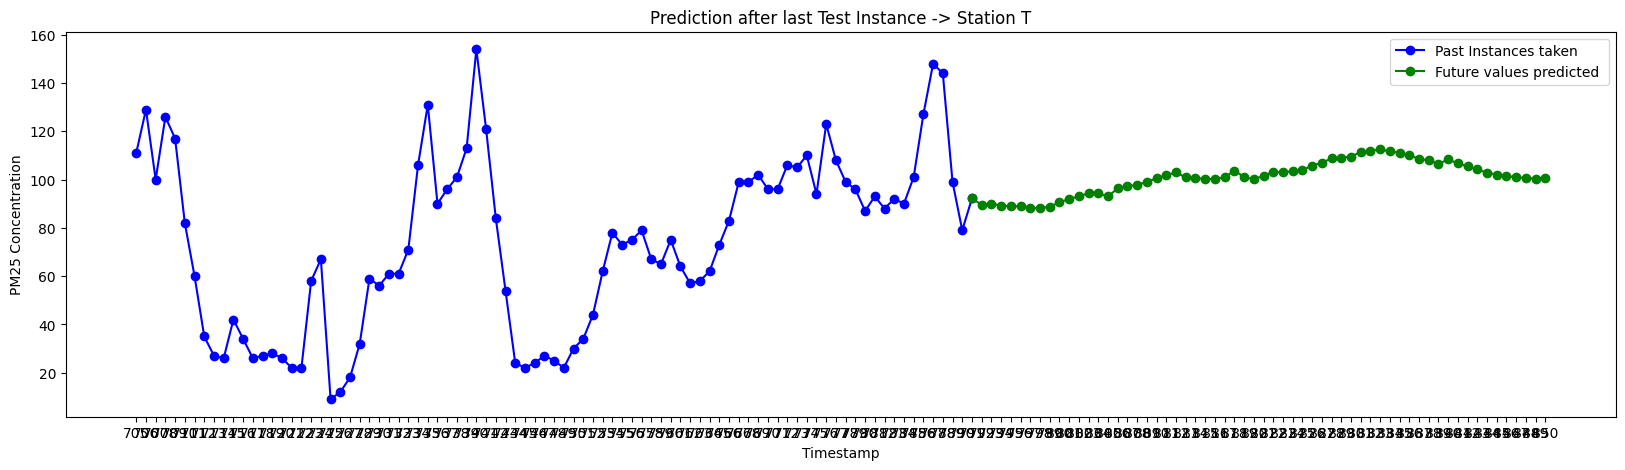

In [ ]:
predict_step_arr = [1,7,14,30,60]
for i in predict_step_arr:
  print('Model Running and predicting for step-size :',i)
  whole_working(i)